In [ ]:
from pathlib import Path
import os
import sys
import tensorflow as tf


In [ ]:
BATCH_SIZE = 64
WINDOW_SIZE = 5
ENCODER_HIDDEN_STATES = 64
DECODER_HIDDEN_STATES = 128

Y_DIM = 1

VALIDATION_RATIO = 0.2

EPOCHS = 20

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=b08b0b3142c1a01d248354e28a436df6fc78cbf568bfc90c637f9b418d8dda08
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
#Import and Stationarize the data 
data = yf.download(["^NSEI","HDFCBANK.NS","HDFC.NS","SBIN.NS","INFY.NS","RELIANCE.NS"], start="2020-08-01", end="2021-08-1")
st_returns = data['Adj Close'].diff()

[*********************100%***********************]  6 of 6 completed


In [ ]:
from cvxopt import matrix, spmatrix, solvers

def l1_trend_filter(y,lambdaaa):

    n = len(y)
    m = n-2
    y = spmatrix(y,range(n),[0]*n,tc='d')
    D = spmatrix([1,-2,1]*m,
                 [j for i in range(m) for j in [i]*3],
                 [j for i in range(m) for j in [i,i+1,i+2]],tc='d')

    P = D * D.T
    q = D * y * (-1)
    q = matrix(q)
    G = spmatrix([1]*m+[-1]*m, range(2*m), 2*[*range(m)])
    h = matrix(lambdaaa, (2*m, 1))
    res = solvers.qp(P, q, G, h)
    sol = y - D.T * res['x']
    return sol

In [ ]:
df1 = pd.DataFrame()
for col in st_returns.columns:
  a1 = l1_trend_filter(np.array(st_returns[col].dropna()),0.005)
  l1 = []
  for i in a1:
    l1.append(i)
  df1[col] = l1[:245]

     pcost       dcost       gap    pres   dres
 0: -1.5507e+05 -8.6683e+04  1e+06  1e+03  1e-16
 1: -1.0094e+05 -3.7704e+04  4e+05  4e+02  2e-16
 2: -2.6111e+04 -3.3223e+03  1e+05  8e+01  7e-16
 3: -9.5201e+02 -2.1271e+02  6e+03  3e+00  4e-16
 4: -7.6052e+01 -1.9958e+02  2e+02  3e-02  3e-16
 5: -8.2424e+01 -1.0844e+02  3e+01  5e-03  3e-16
 6: -8.8183e+01 -9.7189e+01  1e+01  1e-03  2e-16
 7: -9.0067e+01 -9.4286e+01  4e+00  3e-04  2e-16
 8: -9.1470e+01 -9.2302e+01  9e-01  4e-05  2e-16
 9: -9.1819e+01 -9.1860e+01  4e-02  1e-06  3e-16
10: -9.1837e+01 -9.1838e+01  7e-04  1e-09  3e-16
11: -9.1838e+01 -9.1838e+01  1e-05  2e-11  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.5196e+04 -2.4552e+04  2e+05  5e+02  1e-16
 1: -2.7762e+04 -9.4951e+03  1e+05  2e+02  2e-16
 2: -9.4386e+03 -1.2419e+03  3e+04  5e+01  1e-15
 3: -6.4706e+02 -1.0397e+02  2e+03  3e+00  7e-16
 4: -4.5173e+01 -9.4668e+01  7e+01  3e-02  4e-16
 5: -4.5715e+01 -5.7899e+01  2e+01  6e-03  3e-1

In [ ]:
df1

,HDFC.NS,HDFCBANK.NS,INFY.NS,RELIANCE.NS,SBIN.NS,^NSEI
0,40.921147,39.474126,-6.905696,141.140996,-0.639043,203.645391
1,-4.345229,-14.024185,-5.025833,-24.057510,-0.163651,6.415391
2,6.966328,13.073262,25.575764,7.615488,-0.485422,98.480000
3,-5.975361,3.146475,-19.507161,12.300303,-0.287256,13.919414
4,21.047739,6.780752,0.420430,-26.494648,3.101201,56.090586
...,...,...,...,...,...,...
240,31.530049,5.529927,40.129902,26.879902,1.139994,-31.599609
241,-7.780049,-5.939951,0.270000,-14.990000,6.840006,-78.000000
242,-18.219951,-8.189951,13.430073,-28.839854,-5.580006,-37.039805
243,-30.330098,5.179951,-1.339976,-21.870098,6.630024,69.034805


In [ ]:
import numpy as np
import pandas as pd
from typing import Tuple
from sklearn.preprocessing import StandardScaler

features = st_returns.values

print(features.shape)

scale = StandardScaler().fit(features)
features = scale.transform(features)

features

(248, 6)


array([[        nan,         nan,         nan,         nan,         nan,
                nan],
       [ 0.86286532,  1.58652865, -0.55496505,  3.90196336, -0.22788859,
         1.29388415],
       [-0.16483159, -0.66310255, -0.44777167, -0.66977513, -0.15824389,
        -0.09028607],
       ...,
       [-0.25083174, -1.0166474 ,  0.01853997, -0.49205943, -0.76295108,
        -0.39519084],
       [-0.31550983, -0.03303731,  0.4997986 ,  0.43629935,  2.11904306,
         0.34934614],
       [ 0.53208124,  0.27171495, -0.53187092, -0.50035866, -1.50805029,
        -0.24326955]])

In [ ]:
def get_labels_from_features(features):
    return features[WINDOW_SIZE - 1:, -Y_DIM:][:, None, :]


def split_by_ratio(features):
    length = len(features)
    validation_length = int(VALIDATION_RATIO * length)
    
    return features[:-validation_length], features[-validation_length:]


training_features, validation_features = split_by_ratio(features)

print('training length', len(training_features))
print('validation length', len(validation_features))

training length 199
validation length 49


In [ ]:
!pip install get_rolling_window

In [ ]:
import tensorflow as tf
from get_rolling_window import rolling_window

train_f, train_l = rolling_window(training_features, WINDOW_SIZE, 1), get_labels_from_features(training_features)
train_ds = tf.data.Dataset.from_tensor_slices((train_f, train_l)).batch(BATCH_SIZE, drop_remainder=True)

print(train_f.shape, train_l.shape)

val_f, val_l = rolling_window(validation_features, WINDOW_SIZE, 1), get_labels_from_features(validation_features)
val_ds = tf.data.Dataset.from_tensor_slices((val_f, val_l)).batch(BATCH_SIZE, drop_remainder=True)

train_ds

(195, 5, 6) (195, 1, 1)


<BatchDataset shapes: ((64, 5, 6), (64, 1, 1)), types: (tf.float64, tf.float64)>

In [ ]:
!pip install da_rnn

In [ ]:
from da_rnn.keras import DARNN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Reshape

model = DARNN(
    WINDOW_SIZE,
    ENCODER_HIDDEN_STATES,
    DECODER_HIDDEN_STATES,
    Y_DIM
)

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mape']
)

In [ ]:
feature_batch, label_batch = next(iter(train_ds))

print('feature, label shape', feature_batch.shape, label_batch.shape)

print('prediction shape', model(feature_batch).shape)

model(feature_batch[:1])

feature, label shape (64, 5, 6) (64, 1, 1)
prediction shape (64, 1)


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[nan]], dtype=float32)>

In [ ]:
save_to = 'checkpoint.hdf5'

history = model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[
        # Save checkpoints on best validation loss
        tf.keras.callbacks.ModelCheckpoint(
            save_to,
            monitor='mae',
            save_best_only=True,
            verbose=1
        ),
        # Stop early if the model overfits
        tf.keras.callbacks.EarlyStopping(monitor='mae', patience=10)
    ],
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/20
3/3 [==============================] - 0s 38ms/step - loss: nan - mae: nan - mape: nan

Epoch 00001: mae did not improve from inf
Epoch 2/20
3/3 [==============================] - 0s 37ms/step - loss: nan - mae: nan - mape: nan

Epoch 00002: mae did not improve from inf
Epoch 3/20
3/3 [==============================] - 0s 40ms/step - loss: nan - mae: nan - mape: nan

Epoch 00003: mae did not improve from inf
Epoch 4/20
3/3 [==============================] - 0s 39ms/step - loss: nan - mae: nan - mape: nan

Epoch 00004: mae did not improve from inf
Epoch 5/20
3/3 [==============================] - 0s 38ms/step - loss: nan - mae: nan - mape: nan

Epoch 00005: mae did not improve from inf
Epoch 6/20
3/3 [==============================] - 0s 43ms/step - loss: nan - mae: nan - mape: nan

Epoch 00006: mae did not improve from inf
Epoch 7/20
3/3 [==============================] - 0s 41ms/step - loss: nan - mae: nan - mape: nan

Epoch 00007: mae did not improve from inf
Epoch 8/20
3/

KeyError: ignored

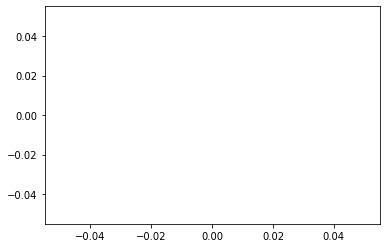

In [ ]:
import matplotlib.pyplot as plt


def plot(keys, title='title', ylabel='y'):
    for key in keys:
        plt.plot(history.history[key])
        plt.plot(history.history[key])
        
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('epoch')
    
    plt.legend(keys, loc='upper left')
    
    plt.show()
    
plot(['loss', 'val_loss'], 'loss')
plot(['mae', 'val_mae'], 'mae')
plot(['mape', 'val_mape'], 'mape')
